In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [31]:
df = pd.read_csv('spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [32]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [33]:
df.drop_duplicates(inplace=True)

In [34]:
X = df['text']
y = df['label_num']

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [37]:
model = MultinomialNB()
model.fit(X_train_counts,y_train)

MultinomialNB()

In [38]:
y_pred = model.predict(X_test_counts)

In [39]:
y_test

1566    0
1988    1
1235    0
2868    0
4903    0
       ..
1175    1
4476    0
4198    1
2689    0
2142    0
Name: label_num, Length: 1035, dtype: int64

[[729  13]
 [ 16 277]]


0.9719806763285024

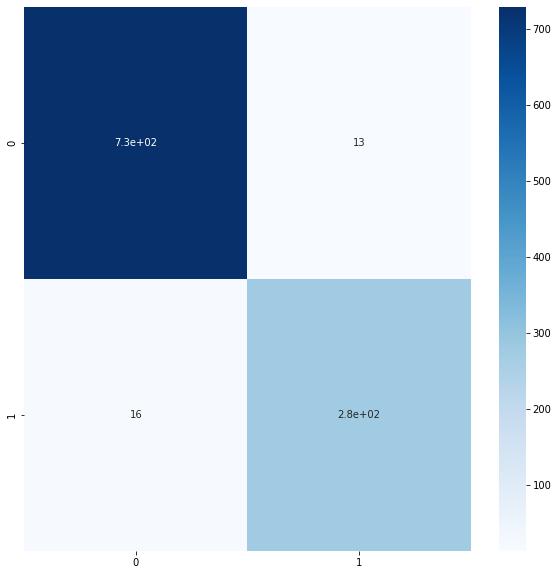

In [41]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(10,10))
sns.heatmap(cm,cmap='Blues',annot=True)
accuracy_score(y_test, y_pred)